In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
df1 = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

C:\Users\acer\AppData\Local\Temp\ipykernel_20012\43870257.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


In [314]:
merged_df1 = df1[df1['iyear'].isin([2014,2015,2016,2017])]

In [315]:
# merged_df= merged_df1.groupby(['iday', 'imonth', 'iyear', 'extended', 'country_txt', 'region_txt', 
#     'provstate', 'city', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
#     'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 
#     'nwound', 'property', 'propextent_txt','gname' ,'claimed', 'claimmode_txt']).size().reset_index()
# merged_df= merged_df1.groupby(['iday', 'imonth','iyear', 'country_txt', 'region_txt', 
#     'provstate', 'city', 'targtype1_txt', 'targsubtype1_txt',
#     'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 
#     'nwound', 'propextent_txt','gname' , 'claimmode_txt']).size().reset_index()
merged_df= merged_df1.groupby(['iday', 'imonth','iyear', 'country_txt', 'region_txt', 
    'provstate', 'targtype1_txt', 'targsubtype1_txt',
    'corp1',  'weaptype1_txt', 'weapsubtype1_txt','gname' , 'claimmode_txt']).size().reset_index()

In [316]:
merged_df.columns = merged_df.columns.astype(str)

## REMOVING CLASSES W 0 OCCURENCE AND GROUPING CLASSES WITH LOW OCCURENCES TOGETHER

In [347]:
value_counts = merged_df['gname'].value_counts()
classes_to_keep = value_counts[value_counts > 0].index

merged_df = merged_df[merged_df['gname'].isin(classes_to_keep)]

threshold = 50
rare_classes = value_counts[value_counts < threshold].index

merged_df['gname'] = merged_df['gname'].replace(rare_classes, 'Other')

merged_df['gname'].value_counts()


gname
Other                                             2243
Islamic State of Iraq and the Levant (ISIL)       1749
Taliban                                           1460
Al-Shabaab                                         891
Tehrik-i-Taliban Pakistan (TTP)                    333
New People's Army (NPA)                            253
Sinai Province of the Islamic State                244
Baloch Republican Army (BRA)                       187
Khorasan Chapter of the Islamic State              177
Baloch Liberation Front (BLF)                      138
Al-Qaida in the Arabian Peninsula (AQAP)           131
Communist Party of India - Maoist (CPI-Maoist)     117
Maoists                                            113
Unknown                                            108
Houthi extremists (Ansar Allah)                    104
Al-Nusrah Front                                     80
Boko Haram                                          78
Baloch Liberation Army (BLA)                        73
Trip

In [348]:
#encoding
from sklearn.preprocessing import LabelEncoder
df_encoded = merged_df.copy()
# features = ['iday', 'imonth', 'iyear', 'extended', 'country_txt', 'region_txt', 
#     'provstate', 'city', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
#     'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill',
#     'nwound', 'property', 'propextent_txt','gname' ,'claimed', 'claimmode_txt']
# features = ['iday', 'imonth','iyear', 'country_txt', 'region_txt', 
#     'provstate', 'city', 'targtype1_txt', 'targsubtype1_txt',
#     'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 
#     'nwound', 'propextent_txt','gname' , 'claimmode_txt']
features = ['iday', 'imonth','iyear', 'country_txt', 'region_txt', 
    'provstate', 'targtype1_txt', 'targsubtype1_txt',
    'corp1',  'weaptype1_txt', 'weapsubtype1_txt','gname' , 'claimmode_txt']
le = LabelEncoder()

for column in features:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])


In [349]:
def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    
    df[column] = df[column].astype(float)

    df.loc[df[column] > upper_limit, column] = upper_limit
    df.loc[df[column] < lower_limit, column] = lower_limit

    sns.boxplot(df[column])

In [350]:
df_encoded.drop(['0'],inplace=True ,axis =1)
df_encoded

,iday,imonth,iyear,country_txt,region_txt,provstate,targtype1_txt,targsubtype1_txt,corp1,weaptype1_txt,weapsubtype1_txt,gname,claimmode_txt
0,1,1,2014,59,8,58,13,38,1545,2,1,17,6
1,1,1,2014,59,8,58,13,85,1545,1,29,17,8
2,1,1,2014,68,10,61,2,30,1162,1,29,2,7
3,1,1,2014,68,10,61,9,47,1892,1,29,2,7
4,1,1,2015,0,8,254,6,73,2112,1,10,19,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,31,12,2016,66,5,236,9,44,1767,1,18,11,6
8777,31,12,2017,0,8,297,12,70,32,1,19,19,6
8778,31,12,2017,31,8,234,12,68,398,1,6,17,6
8779,31,12,2017,68,10,61,9,50,61,1,10,2,2


<Axes: >

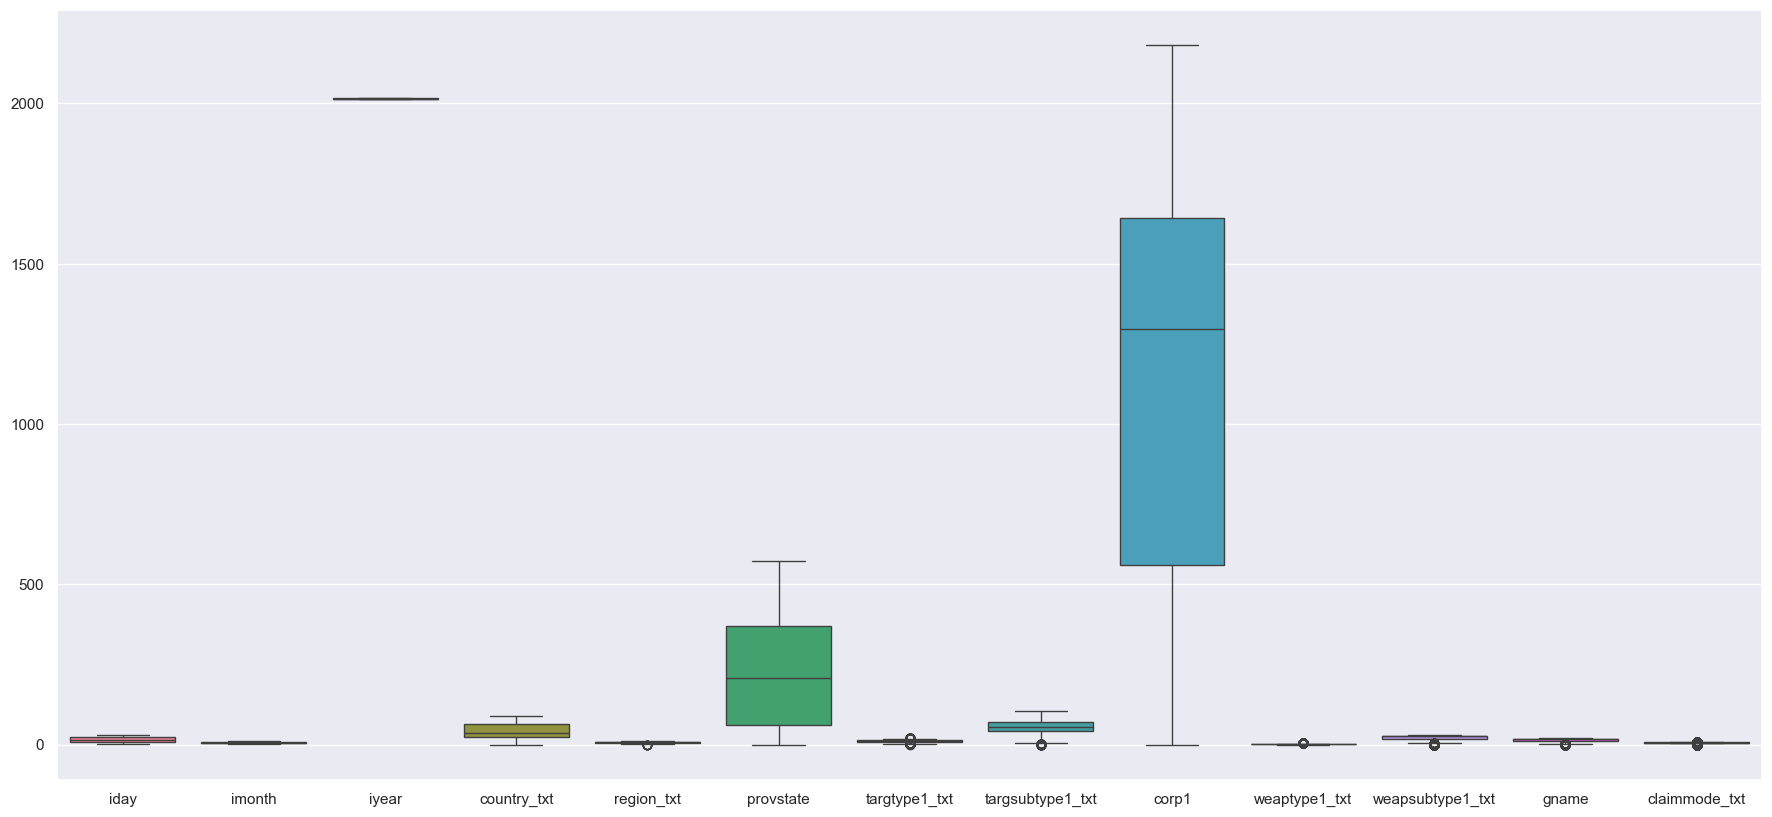

In [351]:
sns.set_theme(rc={'figure.figsize':(22,10)})
sns.boxplot(df_encoded)

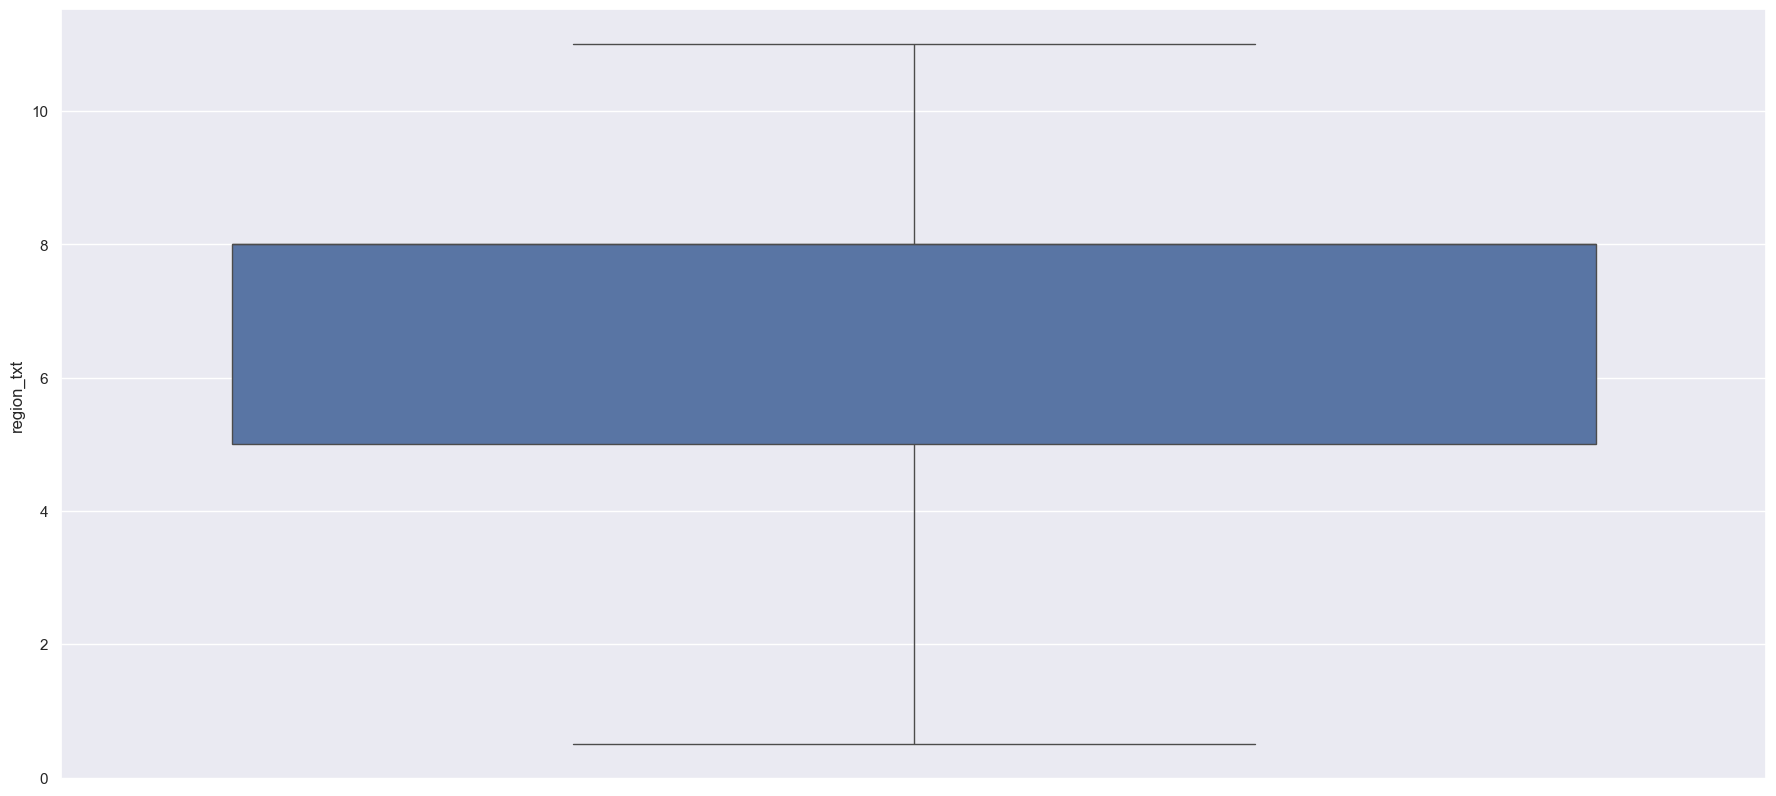

In [352]:
iqr_capping(df_encoded,'region_txt')

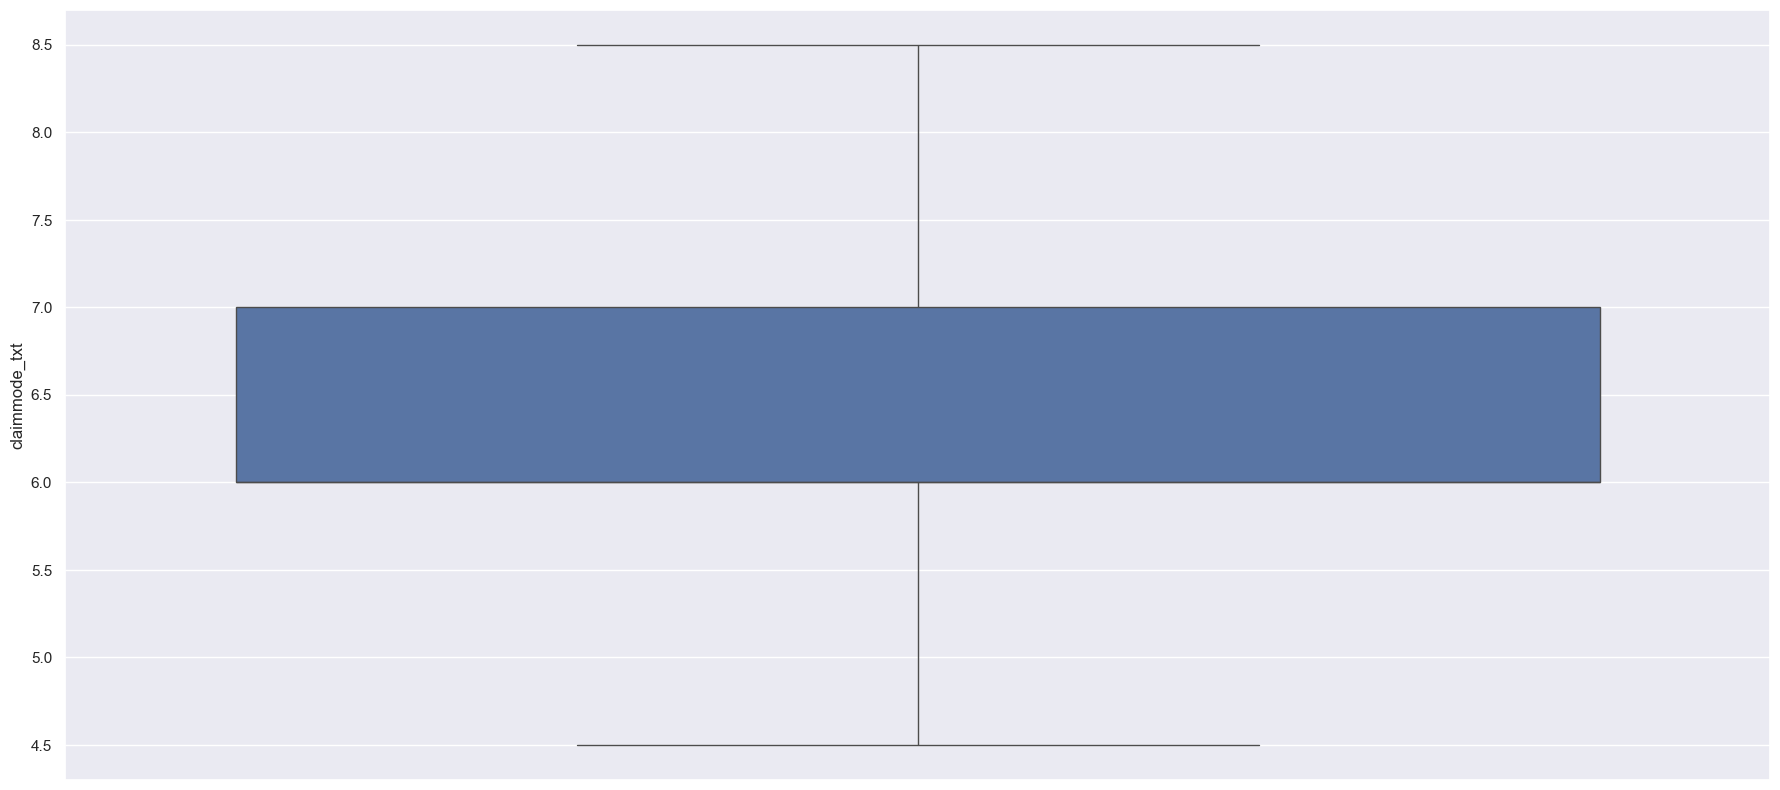

In [353]:
iqr_capping(df_encoded,'claimmode_txt')

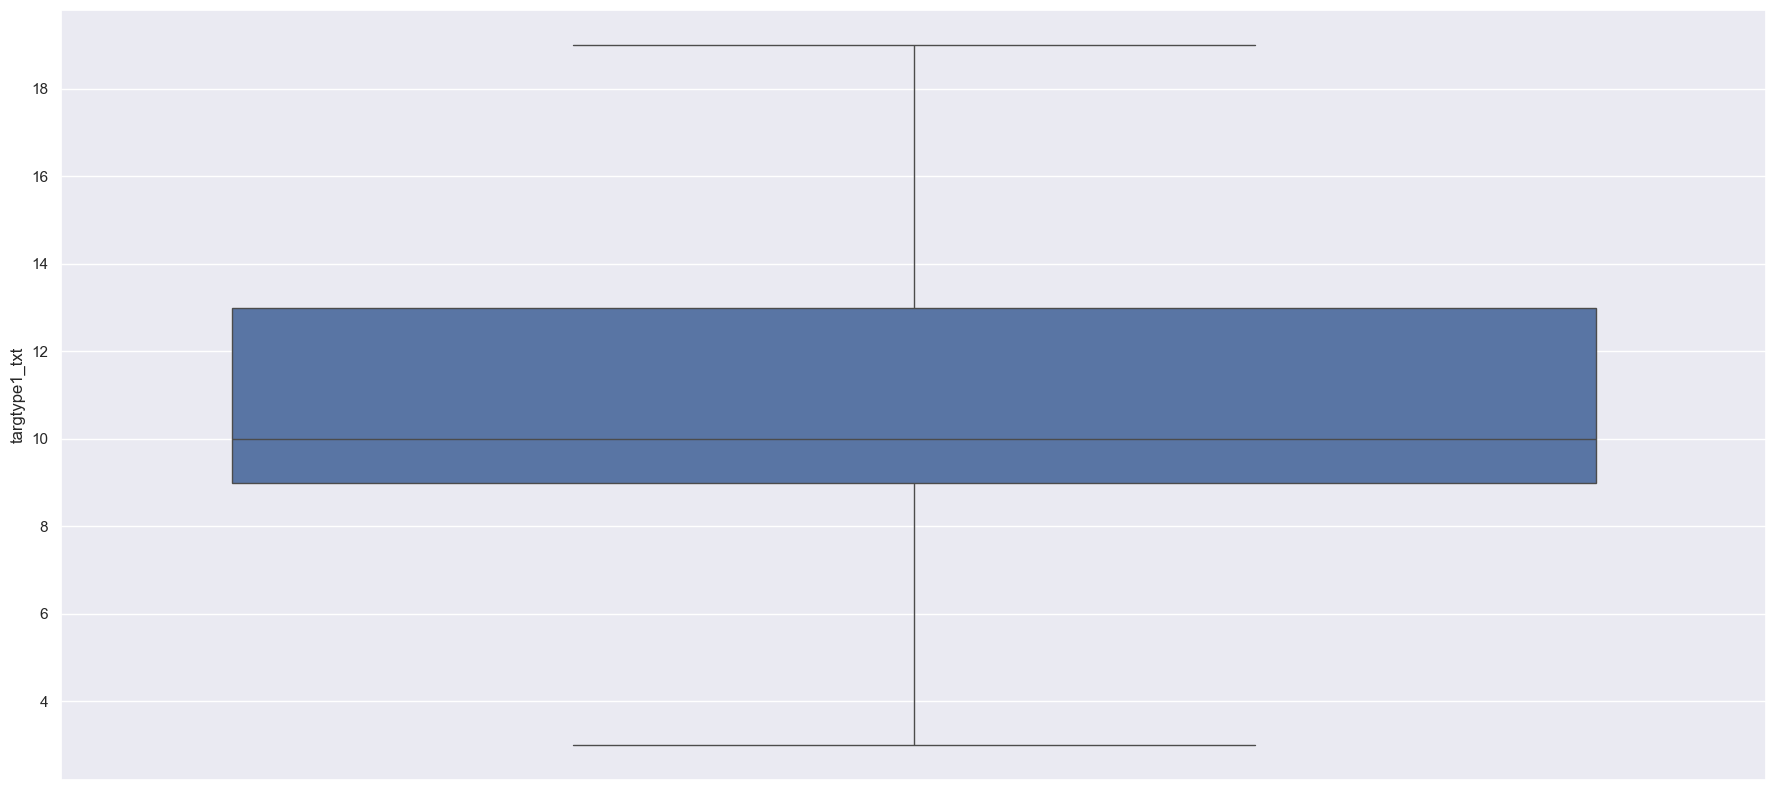

In [354]:
iqr_capping(df_encoded,'targtype1_txt')

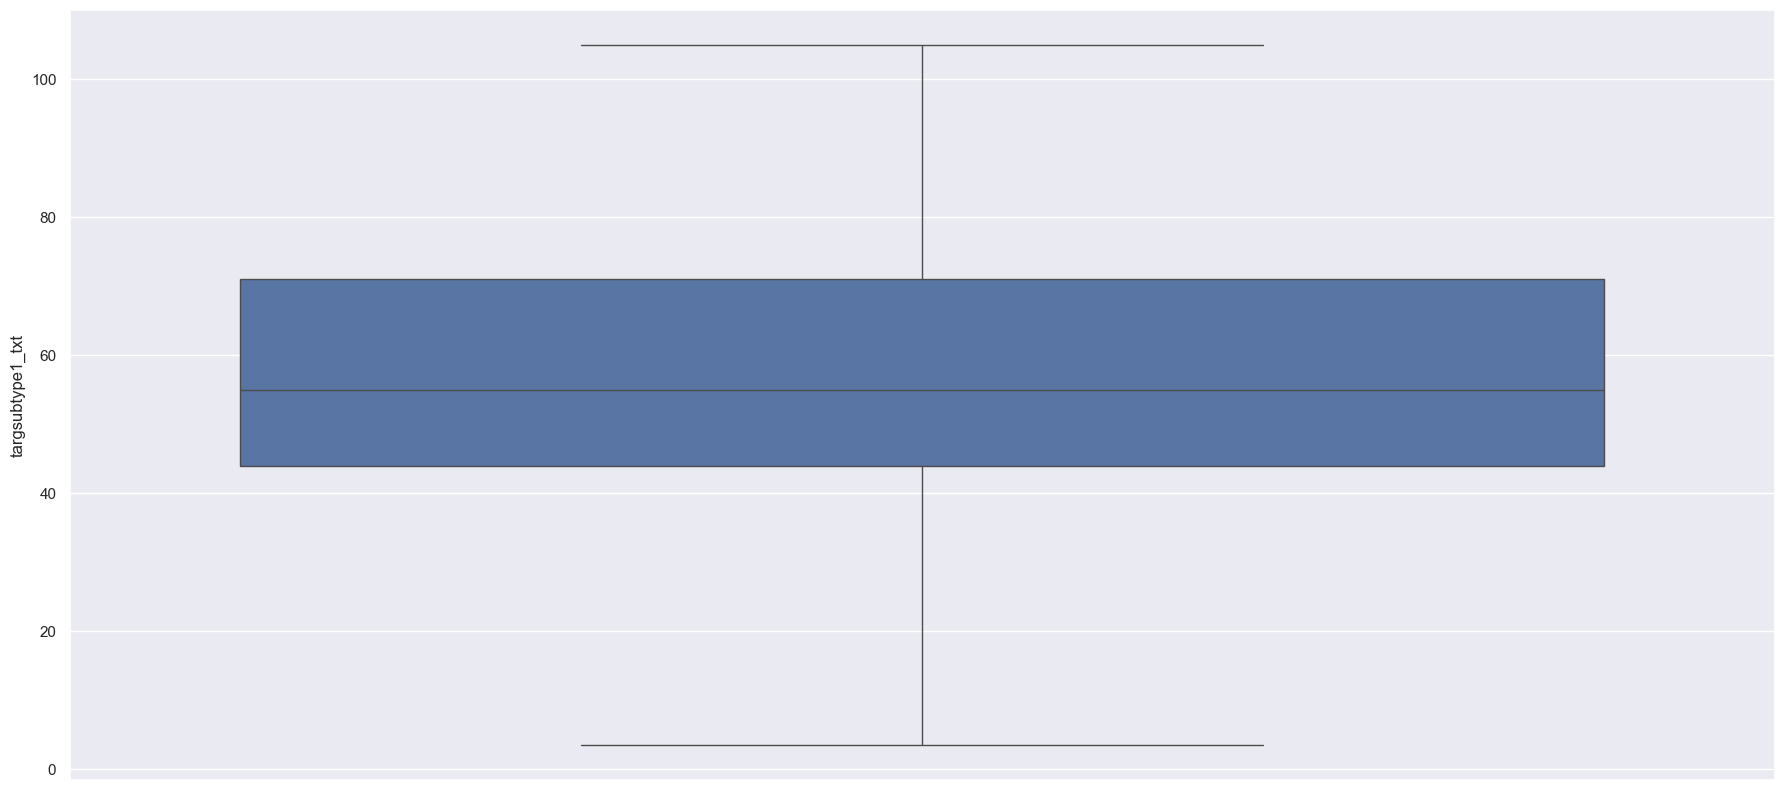

In [355]:
iqr_capping(df_encoded,'targsubtype1_txt')

In [356]:
# iqr_capping(df_encoded,'attacktype1_txt')

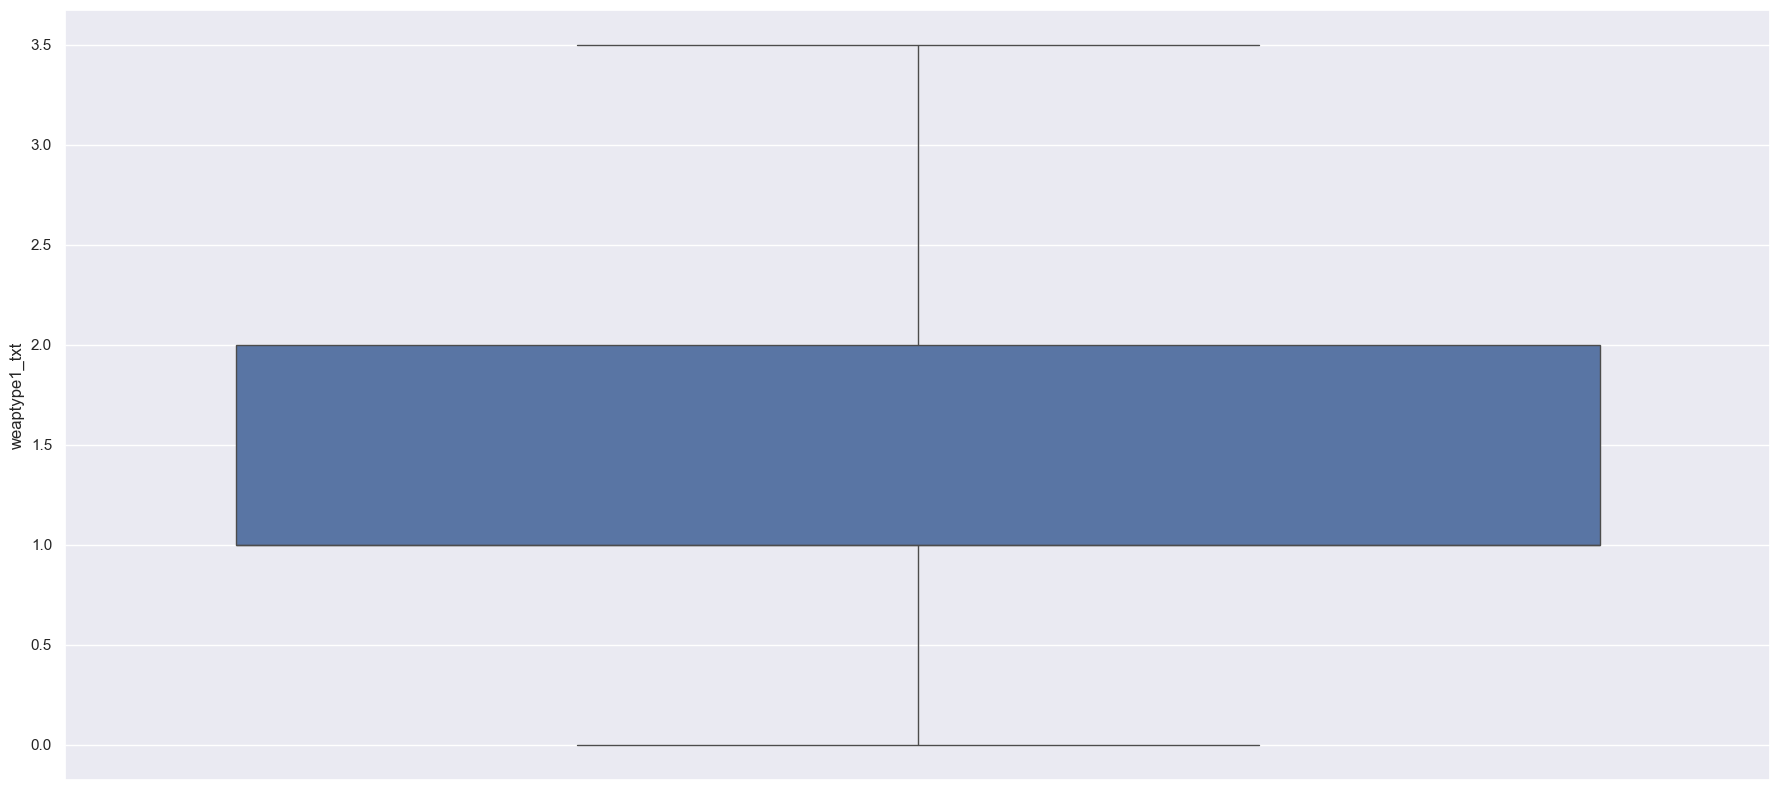

In [357]:
iqr_capping(df_encoded,'weaptype1_txt')

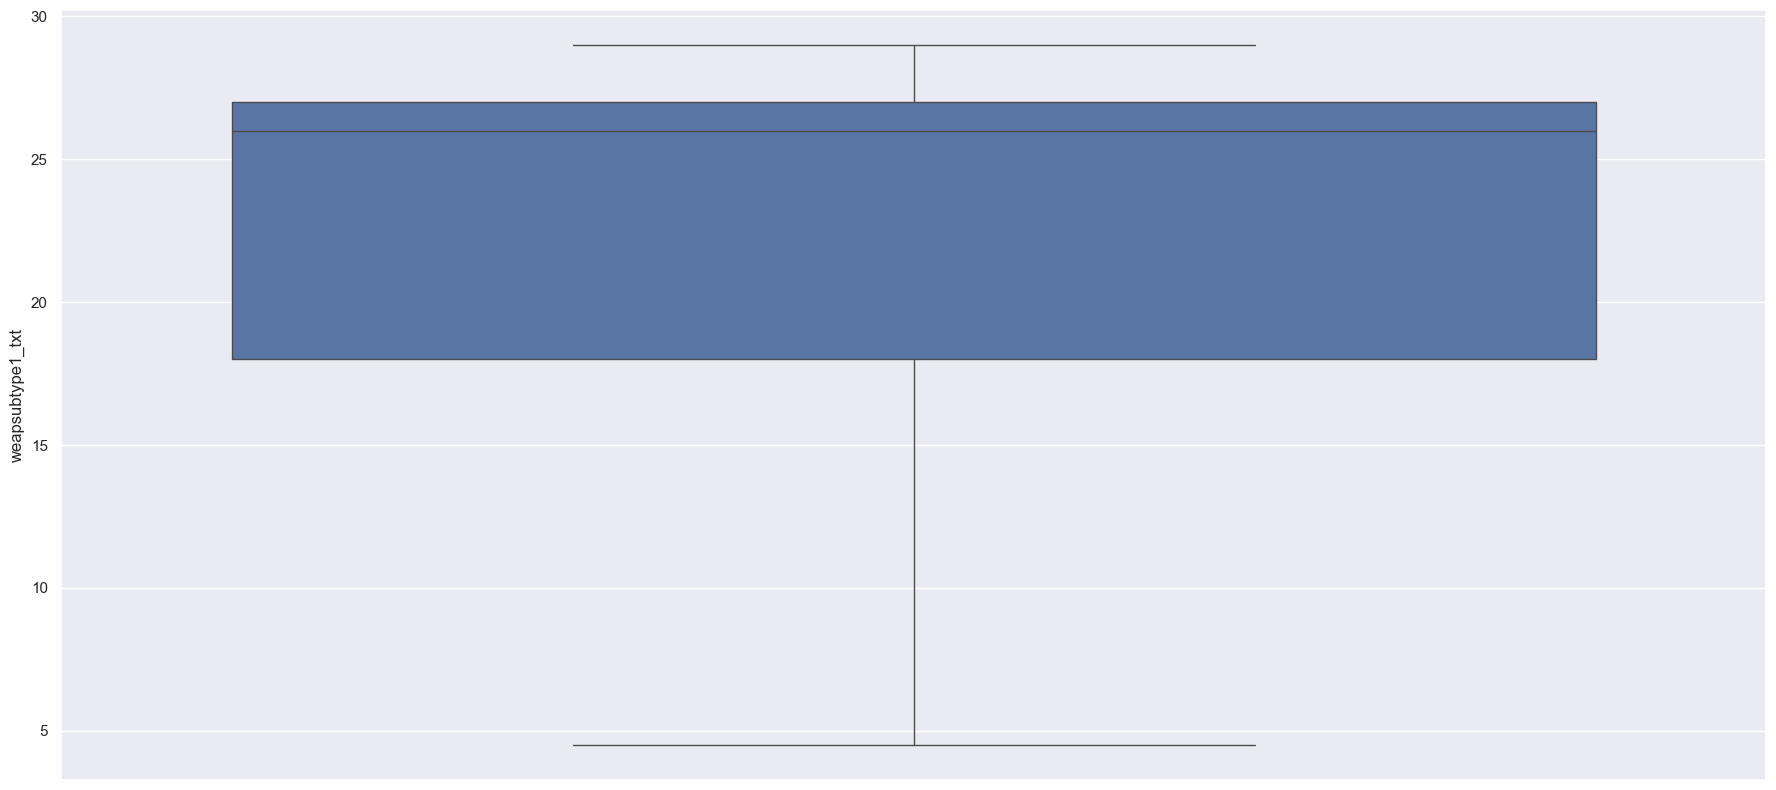

In [358]:
iqr_capping(df_encoded,'weapsubtype1_txt')

In [359]:
# iqr_capping(df_encoded,'nkill')

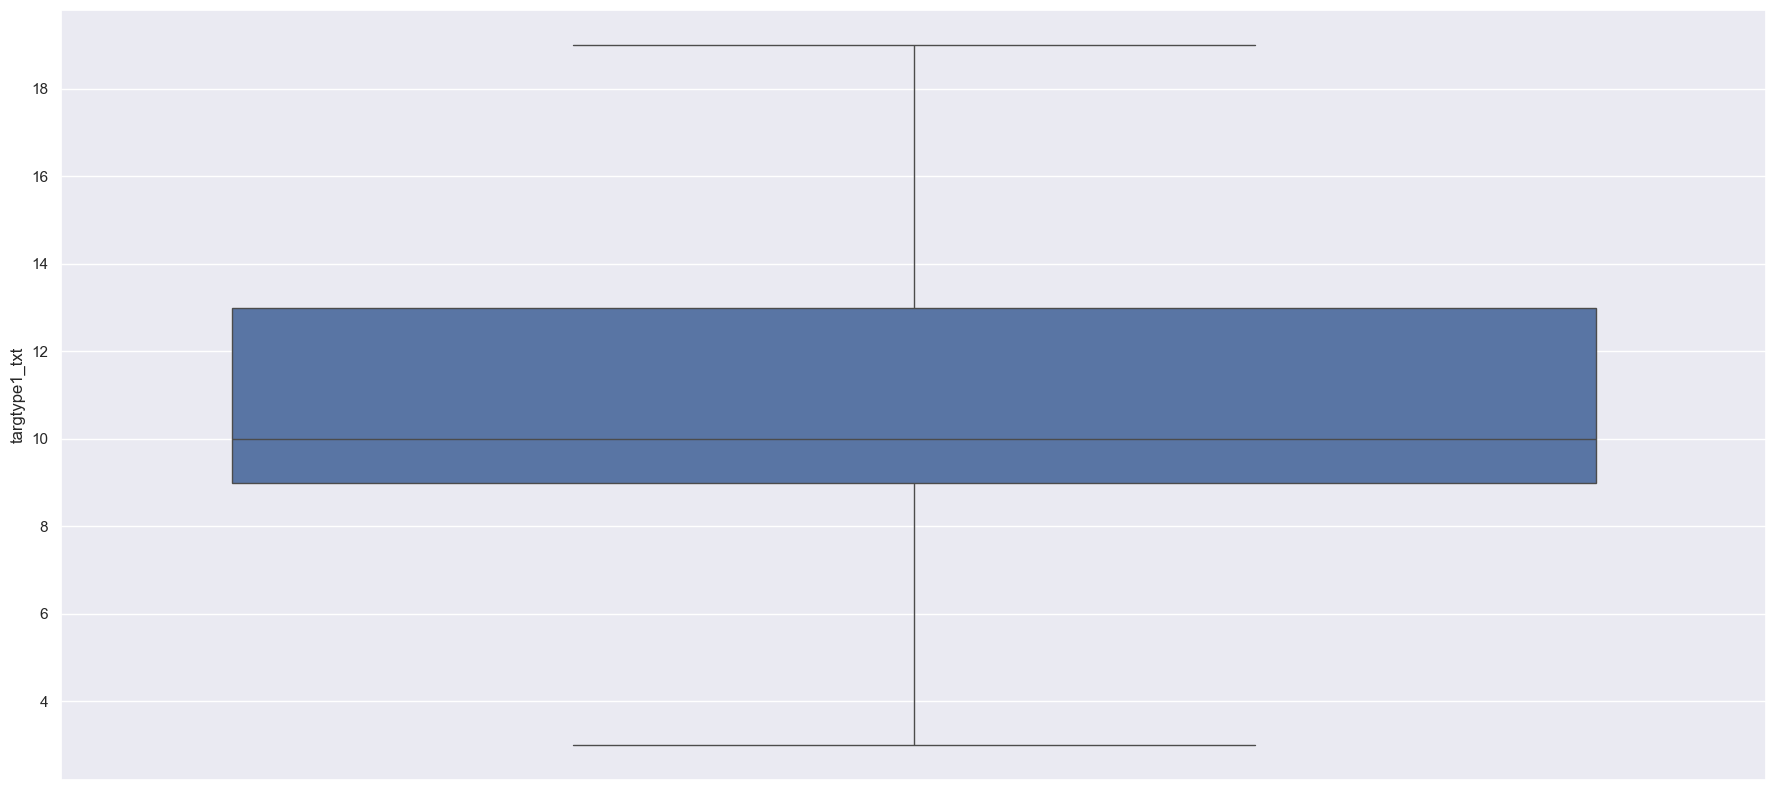

In [360]:
iqr_capping(df_encoded,'targtype1_txt')

In [361]:
# iqr_capping(df_encoded,'nwound')

<Axes: >

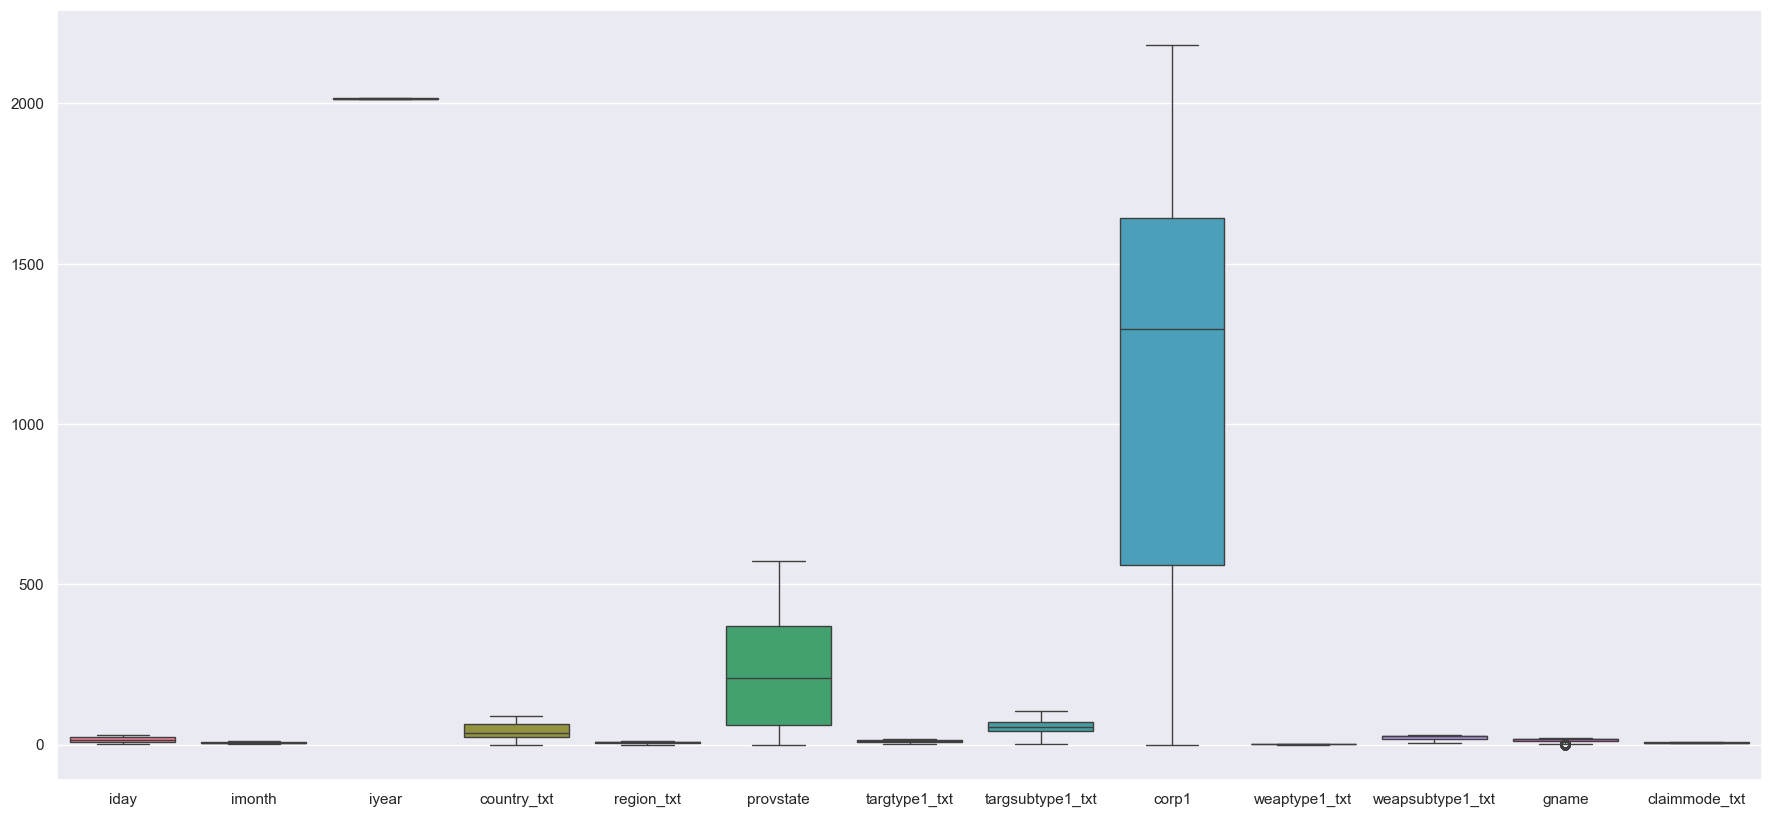

In [362]:
sns.boxplot(df_encoded)

In [363]:
train = df_encoded[df_encoded['iyear'].isin([2014,2015,2016])]
test = df_encoded[df_encoded['iyear'].isin([2017])]

In [364]:
x_train = train.drop('gname',axis=1)
y_train = train['gname']
x_test = test.drop('gname',axis=1)
y_test = test['gname']

<Axes: >

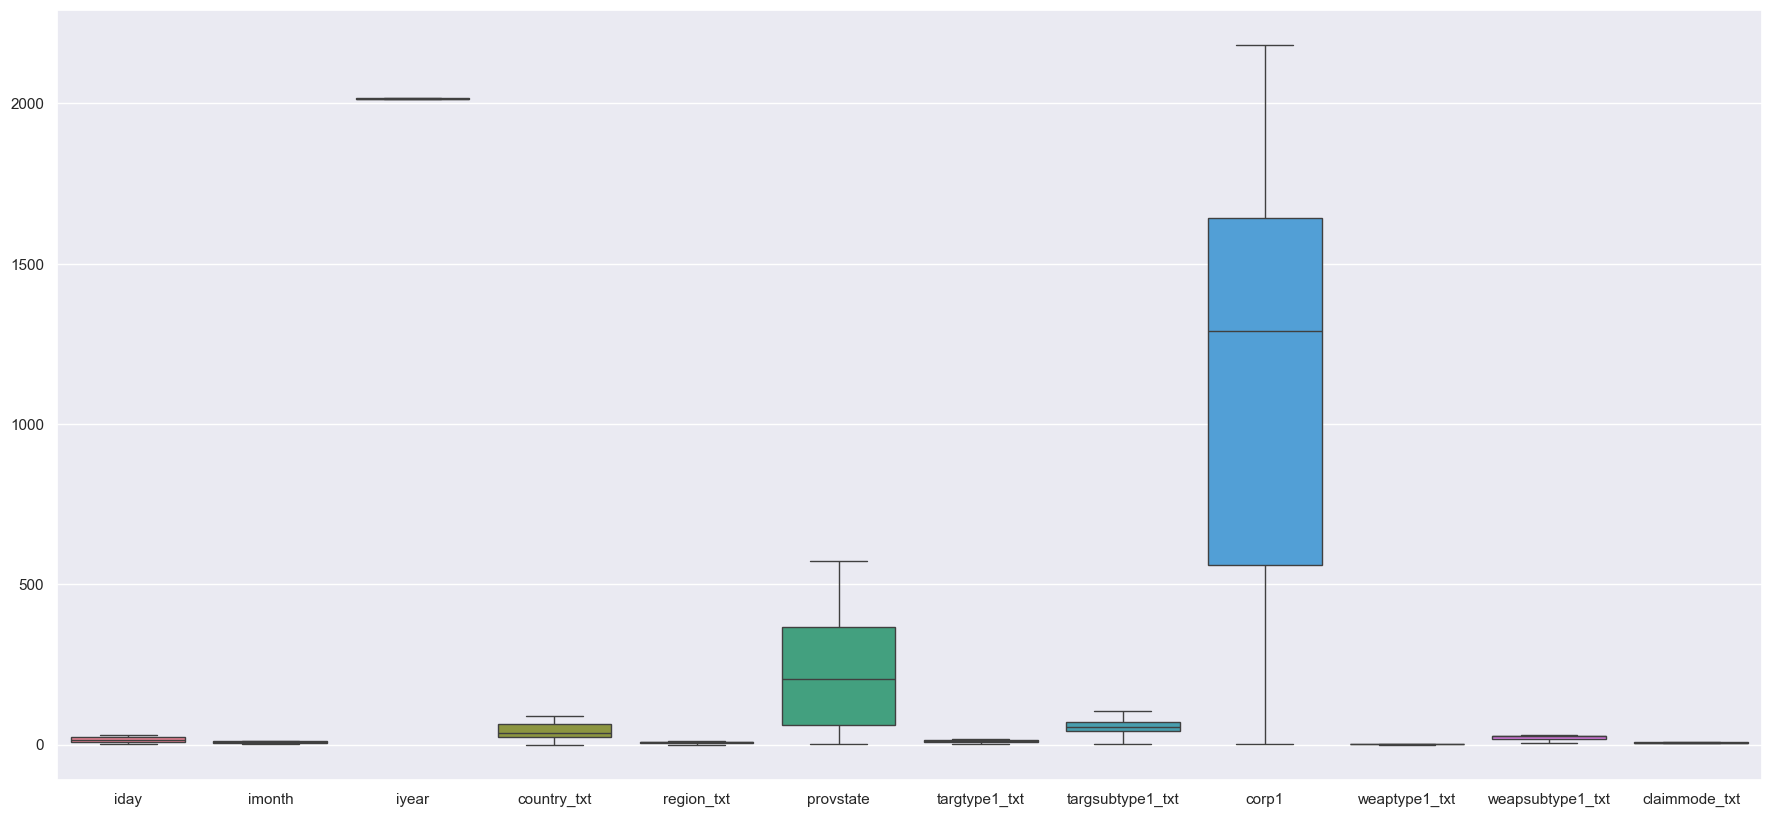

In [365]:
sns.boxplot(x_train)

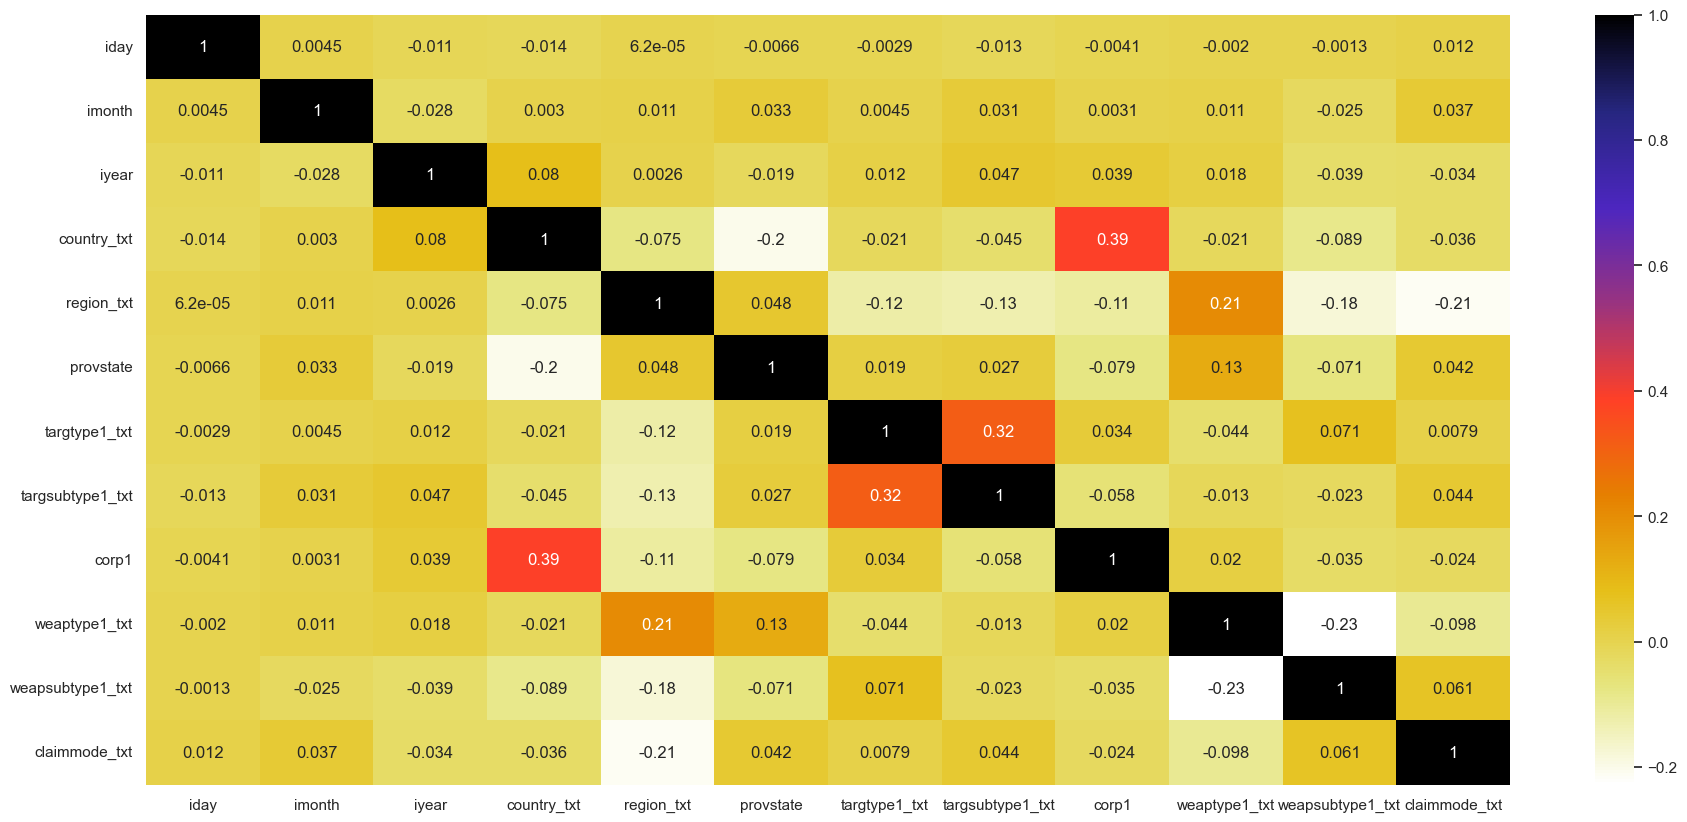

In [366]:
#Using Pearson Correlation
plt.figure(figsize=(22,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [367]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def corr(dataset , threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
    




In [368]:
corr_features = corr(x_train, 0.8)
len(set(corr_features))

0

In [369]:
feature_names = [f"feature {i}" for i in range(x_train.shape[1])]
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11']

In [370]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train.value_counts()

gname
17    1805
12    1279
19    1207
2      577
20     255
18     176
5      175
16     148
1      121
4      118
13      91
15      87
9       83
0       78
11      67
21      67
3       65
10      60
14      59
22      59
8       55
7       52
6       41
Name: count, dtype: int64

In [371]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import numpy as np
# class_counts = y_train.value_counts()

# # Determine the desired number of samples for each class
# # For this example, oversample all classes to have the same number as the majority class
# max_class_samples = class_counts.max()
# sampling_strategy = {cls: max_class_samples for cls in class_counts.index}
# min_samples = y_train.value_counts().min()
# k_neighbors = min(5, min_samples - 1) if min_samples > 1 else 1
# over = SMOTE(sampling_strategy=sampling_strategy, k_neighbors = 1)
# x_train_resample , y_train_resample = over.fit_resample(x_train,y_train)

In [372]:
class_counts = y_train.value_counts()

# Determine the desired number of samples for each class
max_class_samples = class_counts.max()
sampling_strategy_smote = {cls: max_class_samples for cls in class_counts[class_counts > 1].index}
sampling_strategy_ros = {cls: max_class_samples for cls in class_counts[class_counts == 1].index}

smote = SMOTE(sampling_strategy=sampling_strategy_smote, k_neighbors=1)
# ros = RandomOverSampler(sampling_strategy=sampling_strategy_ros)
# under = RandomUnderSampler(sampling_strategy='auto')

# Create a combined oversampling strategy
X_smote, y_smote = smote.fit_resample(x_train, y_train)
# X_ros, y_ros = ros.fit_resample(x_train, y_train)

# X_combined = np.vstack((X_smote, X_ros))
# y_combined = np.hstack((y_smote, y_ros))

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_smote, y_smote)
# model.fit(X_combined, y_combined)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [381]:
y_pred = model.predict(x_test)

In [382]:
r = RandomForestClassifier(n_estimators=200 ,bootstrap =False , max_depth= None ,random_state=42, class_weight= 'balanced')
r.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       n_estimators=200, random_state=42)

## Feature importance with random forest classifier

In [375]:
import time

import numpy as np

start_time = time.time()
importances = r.feature_importances_
std = np.std([tree.feature_importances_ for tree in r.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.088 seconds


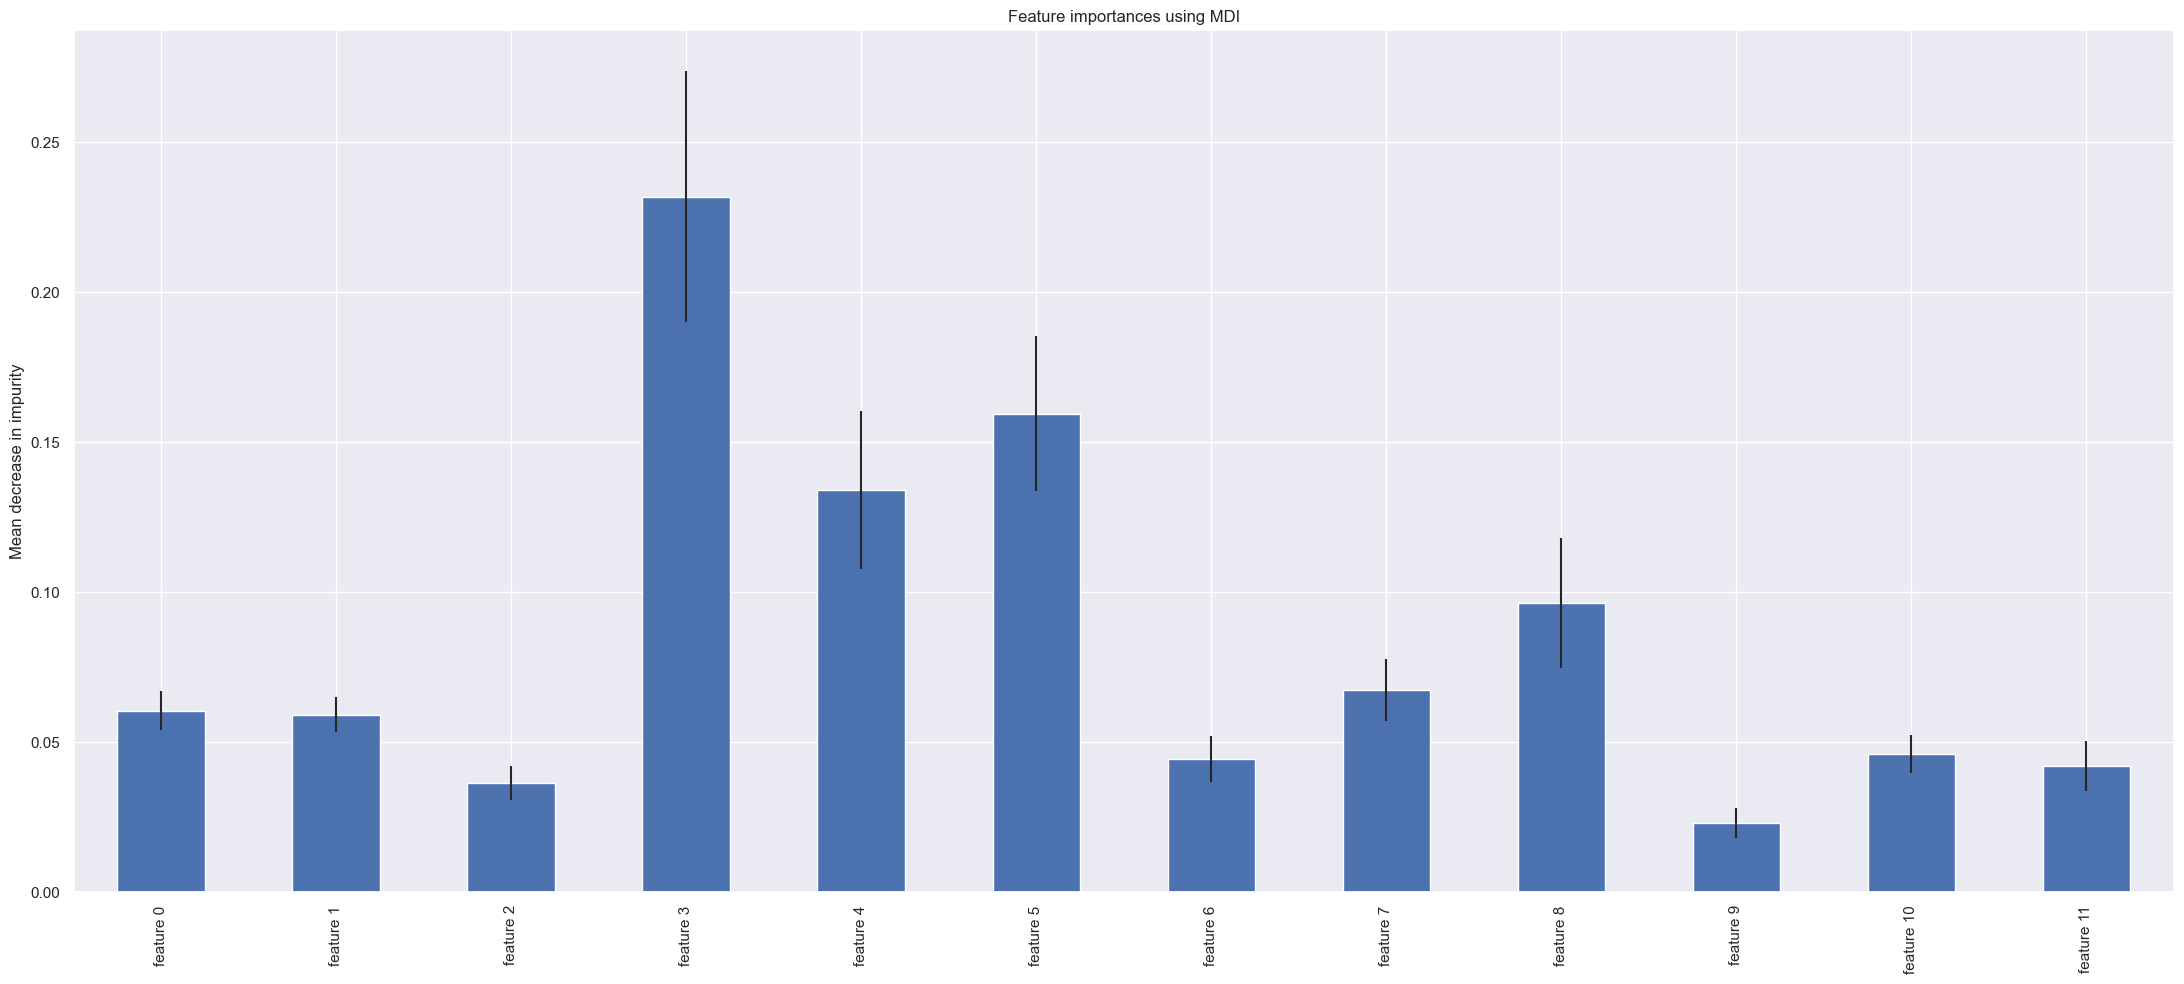

In [376]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [377]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    r, x_test, y_test, n_repeats=10, random_state=42)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 20.288 seconds


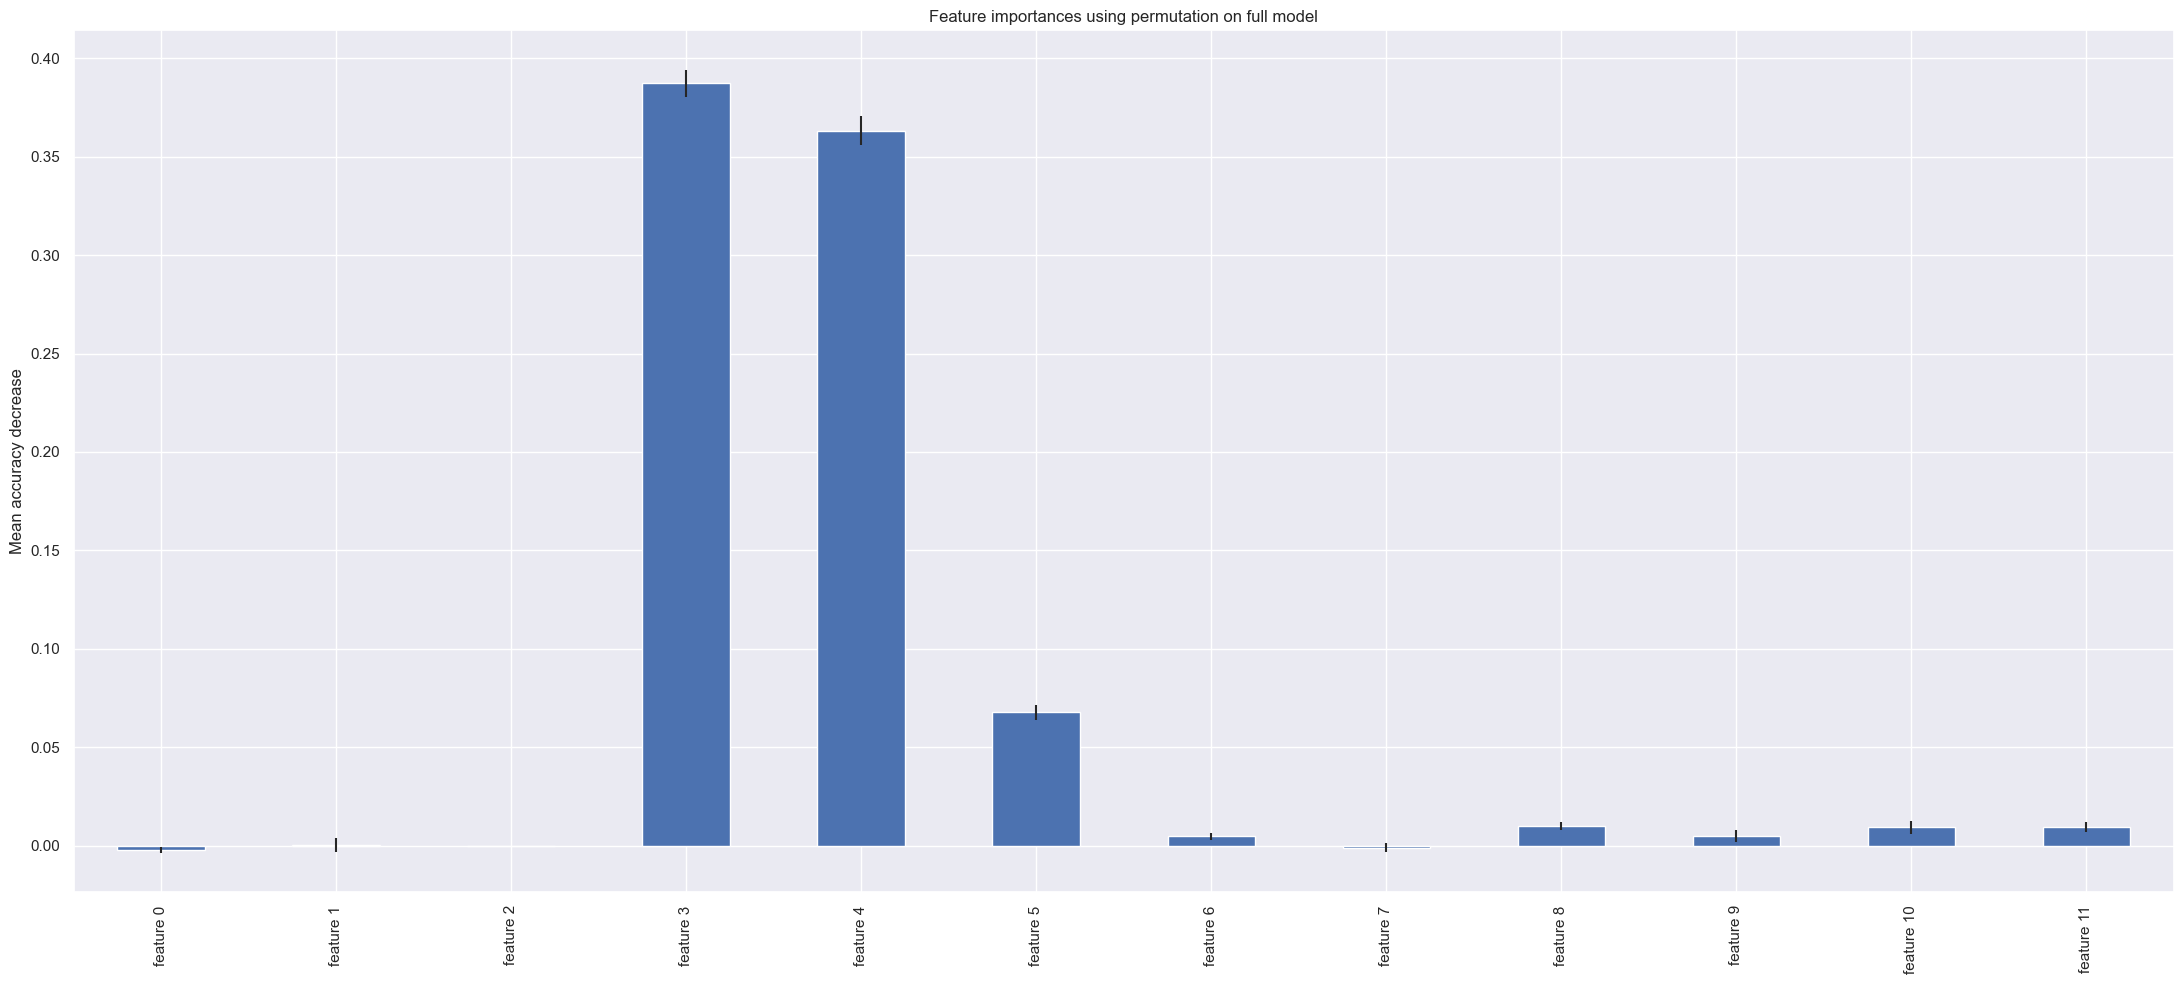

In [378]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [379]:
y_pred = r.predict(x_test)

In [380]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred,zero_division=0))
# plt.figure(figsize=(22, 10))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
# plt.xlabel('Predicted Class', fontsize=14)
# plt.ylabel('True Class', fontsize=14)
# # plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
# plt.show()

Accuracy: 0.8195525291828794
Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0]
 [  0   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0]
 [  0   0 308   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6
    0   0   0   0   0]
 [  0   0   0   3   1   2   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0]
 [  0   0   0   3   3   3   0   0   0   0   0   0   0   0   0   0   0   8
    0   0   3   0   0]
 [  0   0   0   4   1   5   0   0   0   0   0   0   0   1   0   0   0   1
    0   0   0   0   0]
 [  0   0   0   0   0   0   8   0   0   0   0   0   0   0   0   0   4   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   0   6
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9   0   0   0   0   0  15   0  10
    0

In [383]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred,zero_division=0))
# plt.figure(figsize=(22, 10))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
# plt.xlabel('Predicted Class', fontsize=14)
# plt.ylabel('True Class', fontsize=14)
# # plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
# plt.show()

Accuracy: 0.8103112840466926
Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0]
 [  0   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0]
 [  0   0   0   3   2   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0]
 [  0   0   0   6   3   2   0   0   0   0   0   0   0   0   0   0   0   6
    0   0   3   0   0]
 [  0   0   0   4   1   5   0   0   0   0   0   0   0   1   0   0   0   1
    0   0   0   0   0]
 [  0   0   0   0   0   0   8   0   0   0   0   0   0   0   0   0   4   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1]
 [  0   0   1   0   0   0   0   0  17   0   0   0   0   0   0   0   0   5
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13   0   0   0   0   0  14   0   7
    0

In [225]:
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV# Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Initialize the model
# model = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(x_train, y_train)

# # Get the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Predict with the best model
# y_pred = grid_search.best_estimator_.predict(x_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
